# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
# to make this notebook's output stable across runs
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

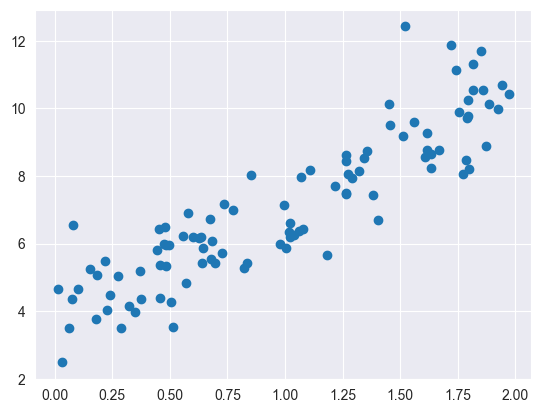

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [7]:
#X_fit[]

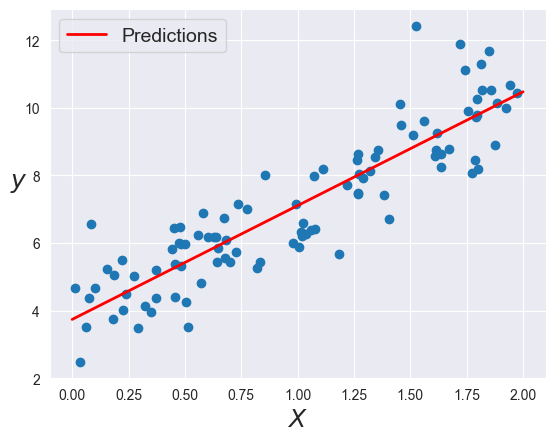

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.30X + 3.57$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

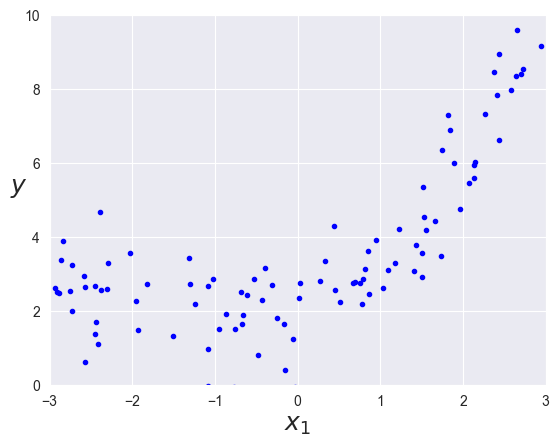

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [16]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [19]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [20]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [21]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.96X +0.96X^2 + 2.19$

Plot the data and the predictions:

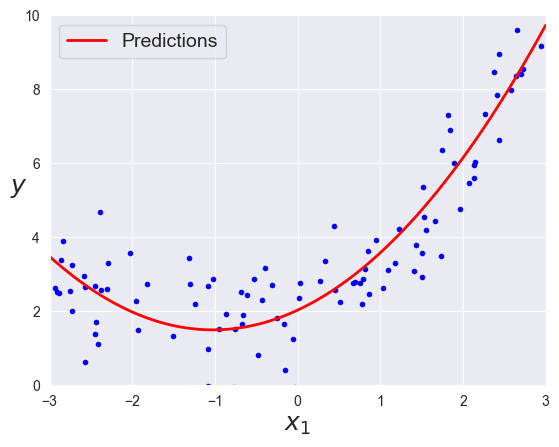

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [23]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [24]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [25]:
len(X)

1000

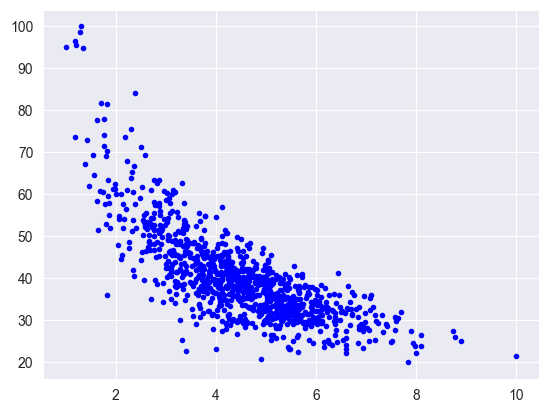

In [26]:
plt.plot(X,y,'b.')

In [27]:
#lineal
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

In [28]:
linear_reg.coef_

array([-6.0333683])

In [29]:
linear_reg.intercept_

67.03904193389238

In [30]:
y_pred = linear_reg.predict(X)

In [31]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('r2_score',r2_score(y, y_pred))

Error medio Absoluto (MAE): 4.921245677483368
Root Mean Squared Error: 6.871474273023592
r2_score 0.5789767558506287


C:\Users\oviwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


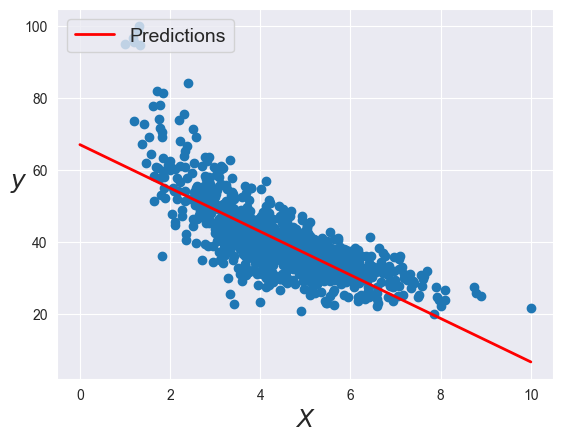

In [32]:
# construct best fit line
X_fit = np.linspace(0, 10, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [33]:
#polinomial

poly_transform = PolynomialFeatures(degree=2, include_bias = False)
polyX = poly_transform.fit_transform(X)

polyX


array([[  1.        ,   1.        ],
       [  1.18599365,   1.40658094],
       [  1.19149864,   1.41966901],
       ...,
       [  8.78088812,  77.10399623],
       [  8.89769971,  79.16906006],
       [ 10.        , 100.        ]])

In [34]:
poly_regression = LinearRegression(fit_intercept=True)
poly_regression.fit(polyX, y)

LinearRegression()

In [35]:
poly_regression.coef_

array([-16.82425278,   1.17336718])

In [36]:
poly_regression.intercept_

89.73719677939124

In [37]:
y_pred = poly_regression.predict(polyX)

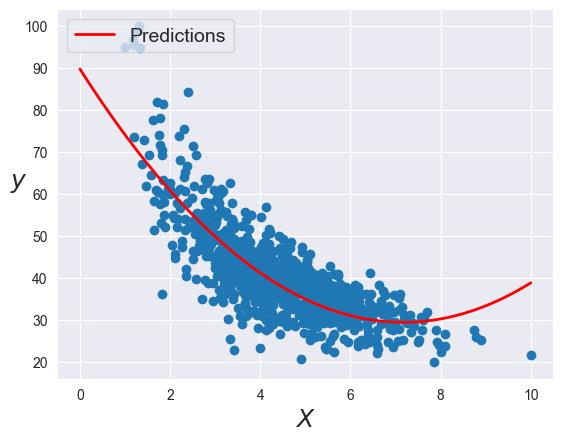

In [38]:
X_fit = np.linspace(0, 10, 100).reshape(100,1)
polyX_fit = poly_transform.fit_transform(X_fit)
polyX_fit
y_fit = poly_regression.predict(polyX_fit)

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [39]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('r2_score',r2_score(y, y_pred))

Error medio Absoluto (MAE): 4.538765565228896
Root Mean Squared Error: 6.129173450227568
r2_score 0.6650268116056028


Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).
Regresión Lineal.
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.
Regresión Polinomial.
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.
Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.
Finalmente grafica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)
Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
282,3.721616,41.496755
837,5.684718,35.075195
807,5.563938,30.078892
948,6.717593,31.416783
161,3.133644,56.183945
234,3.480362,45.066258
957,6.865924,27.901113
974,7.182430,31.221577
479,4.351203,40.618167
414,4.186185,48.143612


In [41]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)##dividimos los datos

## Regresion Lineal

In [43]:
X_train.shape

(800, 1)

In [44]:
y_train.shape

(800,)

In [45]:
y_test.shape

(200,)

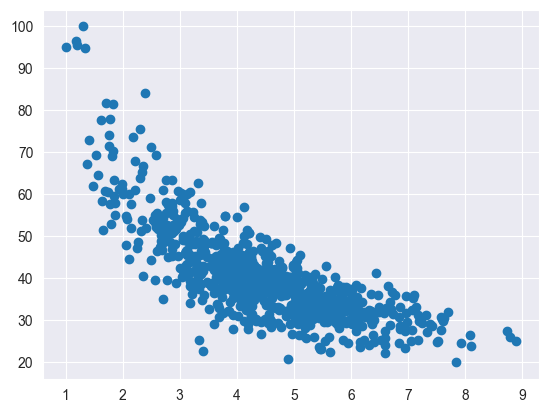

In [46]:
##datos sin entrenamiento
plt.scatter(X_train, y_train);

In [47]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

C:\Users\oviwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


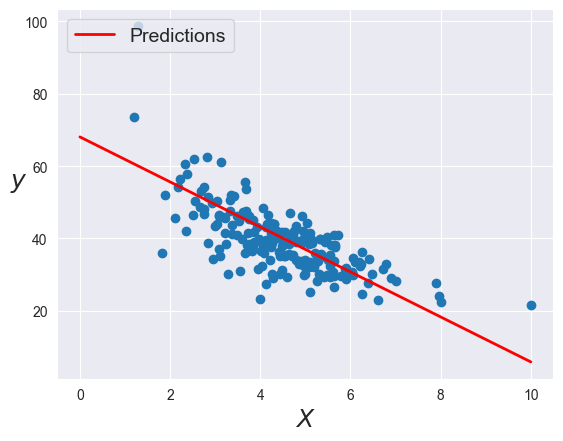

In [48]:
## con lo que tenemos como train vamos a entrenar el linear
X_fit = np.linspace(0, 10, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X_test, y_test)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [49]:
linear_reg.coef_

array([-6.22263745])

In [50]:
linear_reg.intercept_

68.08187672497847

In [51]:
y_pred = linear_reg.predict(X_test)
from sklearn import metrics
from sklearn.metrics import r2_score
linear_Mae=metrics.mean_absolute_error(y_test,y_pred)
linear_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score', r2_score(y_test, y_pred))


Error medio Absoluto (MAE): 4.8332411439887215
Root Mean Squared Error: 6.668203882750842
r2_score 0.4843996957799934


##Conclusion Regresion Lineal

El uso de la regresion logistica es muy mala idea para este modelo los datos estan muy alejados de lo esperado y al ver el nivel de entramiento no es muy bueno , vemos com reaccion el mismo ejercicio pero con el poliomial el cual esperamos mucho mejor comporatmiento

## Regresion polinomial

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)##dividimos los datos

In [53]:
y_train.shape

(800,)

In [54]:
y_test.shape

(200,)

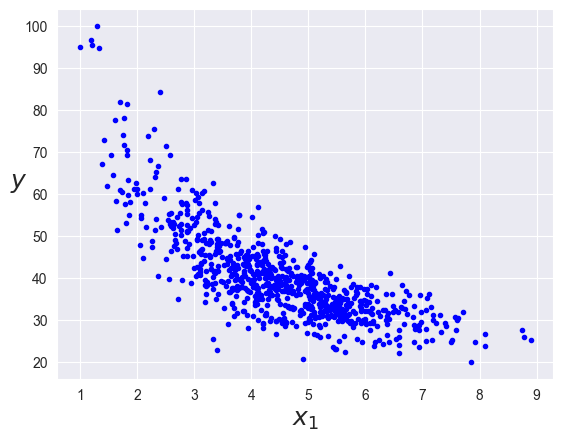

In [55]:
plt.plot(X_train, y_train, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [56]:
from sklearn.preprocessing import PolynomialFeatures

poly_transform = PolynomialFeatures(degree=3, include_bias = False)
polyX = poly_transform.fit_transform(X_train)
polyX

array([[  5.65669179,  31.99816198, 181.00374013],
       [  5.53635996,  30.65128163, 169.69652839],
       [  2.25713058,   5.09463847,  11.49926431],
       ...,
       [  2.64655085,   7.00423138,  18.53705446],
       [  5.18000789,  26.83248172, 138.99246696],
       [  6.37652342,  40.66005096, 259.26976735]])

In [57]:
poly_regression = LinearRegression(fit_intercept=True)
poly_regression.fit(polyX, y_train)

LinearRegression()

In [58]:
poly_regression.coef_

array([-35.3746951 ,   5.28612952,  -0.28112892])

In [59]:
poly_regression.intercept_

115.22180379591052

In [60]:
y_pred = poly_regression.predict(polyX)

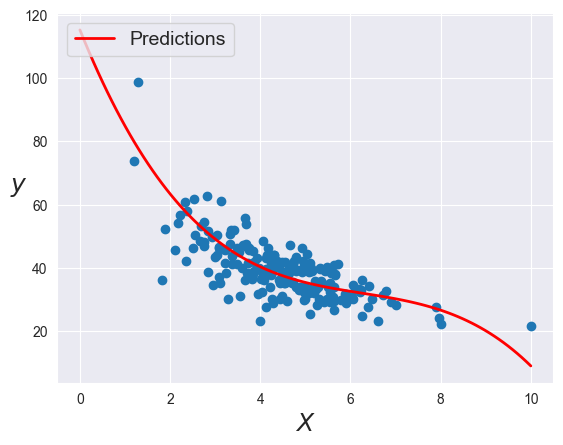

In [61]:
X_fit = np.linspace(0, 10, 100).reshape(100,1)
polyX_fit = poly_transform.fit_transform(X_fit)
polyX_fit
y_fit = poly_regression.predict(polyX_fit)

plt.scatter(X_test, y_test)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [62]:
y_pred.shape

(800,)

In [63]:
y_train.shape

(800,)

In [64]:
poly_transform = PolynomialFeatures(degree=3, include_bias = False)
polyX = poly_transform.fit_transform(X_test)
y_pred = poly_regression.predict(polyX)

In [65]:

from sklearn import metrics
from sklearn.metrics import r2_score
Poly_Mae=metrics.mean_absolute_error(y_test,y_pred)
Poly_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

Error medio Absoluto (MAE): 4.6058129615114
Root Mean Squared Error: 6.2099995227061955
r2_score 0.5528239263527266


### Ridge

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)##dividimos los datos

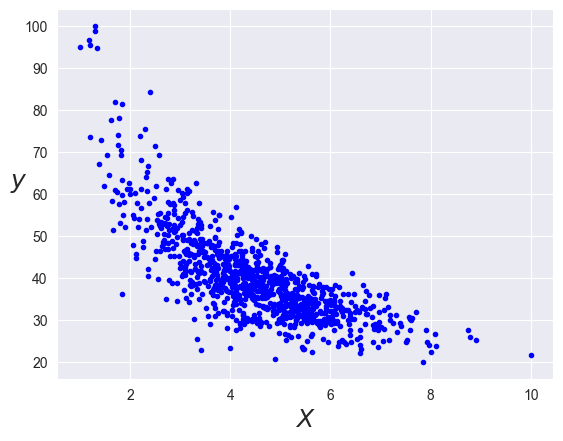

In [67]:
plt.plot(X, y,"b.")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18);

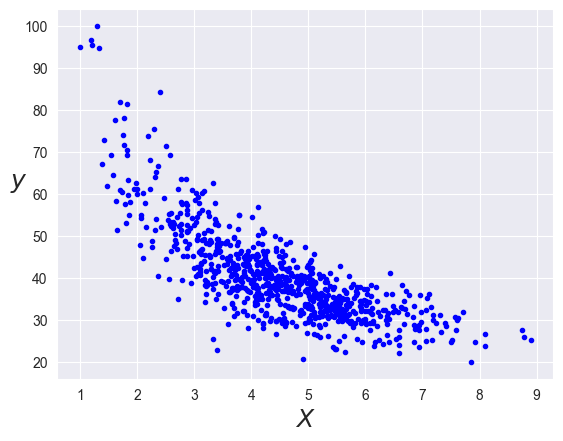

In [68]:
plt.plot(X_train, y_train,"b.")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18);

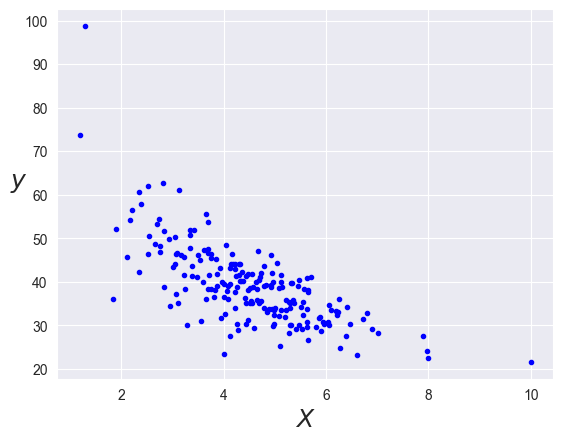

In [69]:
plt.plot(X_test, y_test,"b.")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18);

In [70]:
X_train.shape, y_train.shape

((800, 1), (800,))

In [71]:
X_train2=X_train.to_numpy().reshape(-1,1)

In [72]:
# better
model = Pipeline([("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("linear_reg", LinearRegression())])
model.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('linear_reg', LinearRegression())])

In [73]:
y_pred = model.predict(X_test)

In [74]:
order = np.argsort(X_test.values.ravel())
X_test2 = X_test.values.ravel()[order]
y_test2 = y_test.values[order]
y_pred2 = y_pred[order]

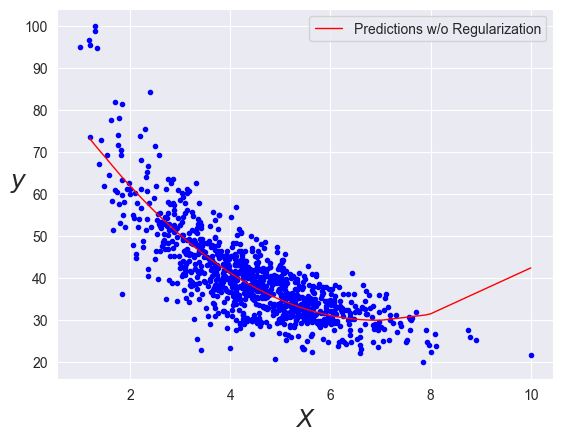

In [75]:
plt.plot(X, y, "b.")
plt.plot(X_test2, y_pred2, "r-", linewidth=1, label="Predictions w/o Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

In [76]:
from sklearn.linear_model import Ridge

model_ridge = Pipeline([("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("ridge", Ridge(alpha = 10, solver = 'cholesky', random_state = 42))])
model_ridge.fit(X_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=10, random_state=42, solver='cholesky'))])

In [77]:
y_pred = model_ridge.predict(X_test)
order = np.argsort(X_test.values.ravel())
X_test2 = X_test.values.ravel()[order]
y_test2 = y_test.values[order]
y_pred2 = y_pred[order]

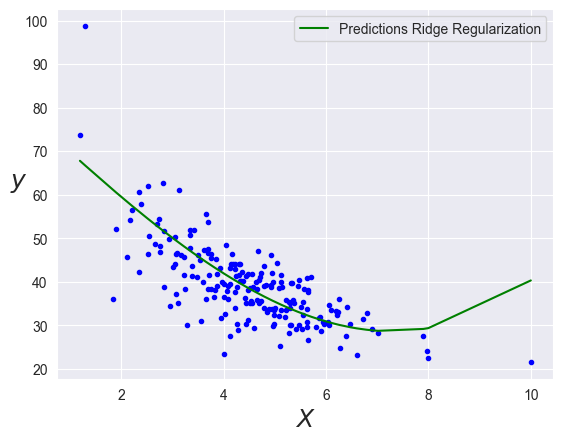

In [78]:
plt.plot(X_test, y_test, "b.")
plt.plot(X_test2, y_pred2, "g-",label="Predictions Ridge Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

In [79]:
X_test=X_test.to_numpy().reshape(-1,1)

In [80]:
y_pred = model.predict(X_test)

C:\Users\oviwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [81]:
from sklearn import metrics
from sklearn.metrics import r2_score
Ridge_Mae=metrics.mean_absolute_error(y_test,y_pred)
Ridge_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

Error medio Absoluto (MAE): 4.762293483795133
Root Mean Squared Error: 6.513768934466413
r2_score 0.508005642552175


### Lasso

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)##dividimos los datos

In [83]:
from sklearn.linear_model import Lasso

model_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
                        ("scaler", StandardScaler()),
                        ("lasso", Lasso(alpha = 0.0001, random_state = 42))])
model_lasso.fit(X_train, y_train)

C:\Users\oviwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.362e+04, tolerance: 9.470e+00
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.0001, random_state=42))])

In [84]:
y_pred = model_lasso.predict(X_test)

In [85]:
order = np.argsort(X_test.values.ravel())
X_test2 = X_test.values.ravel()[order]
y_test2 = y_test.values[order]
y_pred2 = y_pred[order]

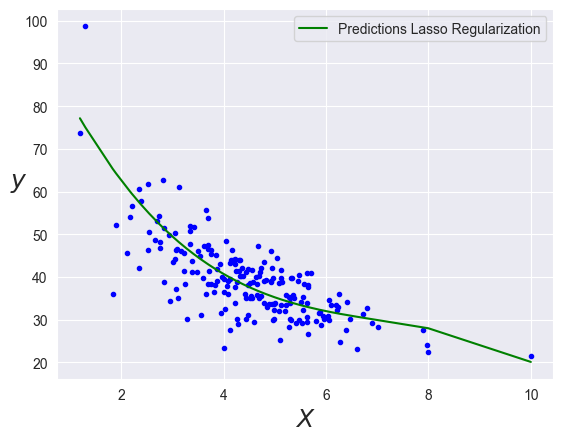

In [86]:
plt.plot(X_test, y_test, "b.")
plt.plot(X_test2, y_pred2, "g-",label="Predictions Lasso Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

In [87]:
y_pred = model_lasso.predict(X_test)

In [88]:
from sklearn import metrics
from sklearn.metrics import r2_score
Lasso_MAE=metrics.mean_absolute_error(y_test,y_pred)
Lasso_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

Error medio Absoluto (MAE): 4.5632573818206525
Root Mean Squared Error: 6.173935044214329
r2_score 0.5580027810942357


### Mae

In [89]:
def diagramas(metricas):
    sumt=list()
    diagrama=metricas
    sumt.append(diagrama)
    return sumt

In [90]:
Metricas = list()
Metricas.append('Lin')
Metricas.append('Poly')
Metricas.append('Ridge')
Metricas.append('Lasso')


In [91]:
MAE = list()
MAE.append(linear_Mae)
MAE.append(Poly_Mae)
MAE.append(Ridge_Mae)
MAE.append(Lasso_MAE)

In [92]:
MAE

[4.8332411439887215, 4.6058129615114, 4.762293483795133, 4.5632573818206525]

MAE
[4.8332411439887215, 4.6058129615114, 4.762293483795133, 4.5632573818206525]


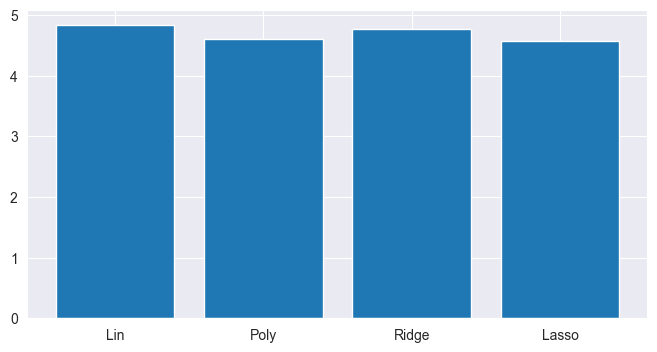

In [93]:
fig, ax = plt.subplots(figsize =(8, 4))
print("MAE")
print(MAE)
Metricas=list(Metricas)
MAE=list(MAE)
plt.bar(Metricas,MAE)


plt.show()

### R2

In [94]:
R2 = list()
R2.append(linear_r2)
R2.append(Poly_r2)
R2.append(Ridge_r2)
R2.append(Lasso_r2)

r2
[0.4843996957799934, 0.5528239263527266, 0.508005642552175, 0.5580027810942357]


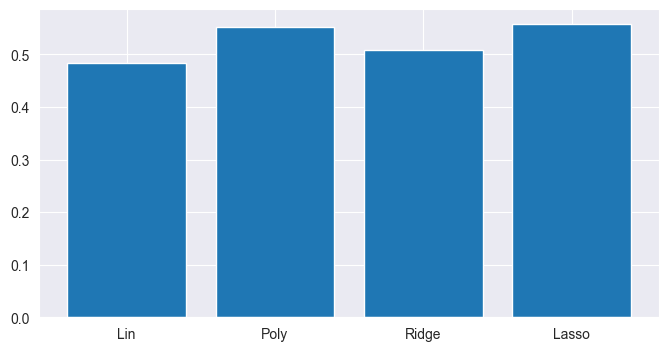

In [95]:
fig, ax = plt.subplots(figsize =(8, 4))
print("r2")
print(R2)
R2=list(R2)
plt.bar(Metricas,R2)


plt.show()

#Ejercicio 2
Casas en King Country

In [96]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2009,2472930270,20140905T000000,485000.0,3,2.50,3110,9015,2.0,0,0,...,9,3110,0,1990,0,98058,47.4369,-122.147,2650,8960
10935,2141500070,20140619T000000,450000.0,4,2.50,2400,7693,2.0,0,0,...,8,2400,0,2003,0,98059,47.4881,-122.142,2400,8038
21496,1283800110,20140506T000000,776000.0,4,2.50,3040,6425,2.0,0,0,...,8,3040,0,2008,0,98052,47.6788,-122.117,3040,7800
15805,3904901300,20150414T000000,468000.0,3,2.25,1470,5597,2.0,0,0,...,7,1470,0,1985,0,98029,47.5674,-122.019,1610,5217
9578,3204300625,20140903T000000,785950.0,4,3.00,2530,4560,1.5,0,0,...,7,1540,990,1925,2014,98112,47.6287,-122.300,1640,4560
19889,1776460140,20140724T000000,395000.0,3,2.50,2130,5088,2.0,0,0,...,8,1840,290,2011,0,98019,47.7329,-121.976,2130,5762
5076,5100402764,20150415T000000,740000.0,3,1.00,1230,6380,1.5,0,0,...,7,1230,0,1927,0,98115,47.6947,-122.315,1250,6380
235,1762600320,20140610T000000,1025000.0,5,4.00,3760,28040,2.0,0,0,...,10,3760,0,1983,0,98033,47.6489,-122.183,3430,35096
3381,7854800090,20141107T000000,799950.0,3,3.00,2900,11769,2.0,0,0,...,10,2900,0,1997,0,98052,47.6993,-122.118,2900,9611
12893,1431600180,20150403T000000,335000.0,5,3.00,2660,7700,1.5,0,0,...,7,1670,990,1962,0,98058,47.4600,-122.174,1610,7700


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [98]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [99]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


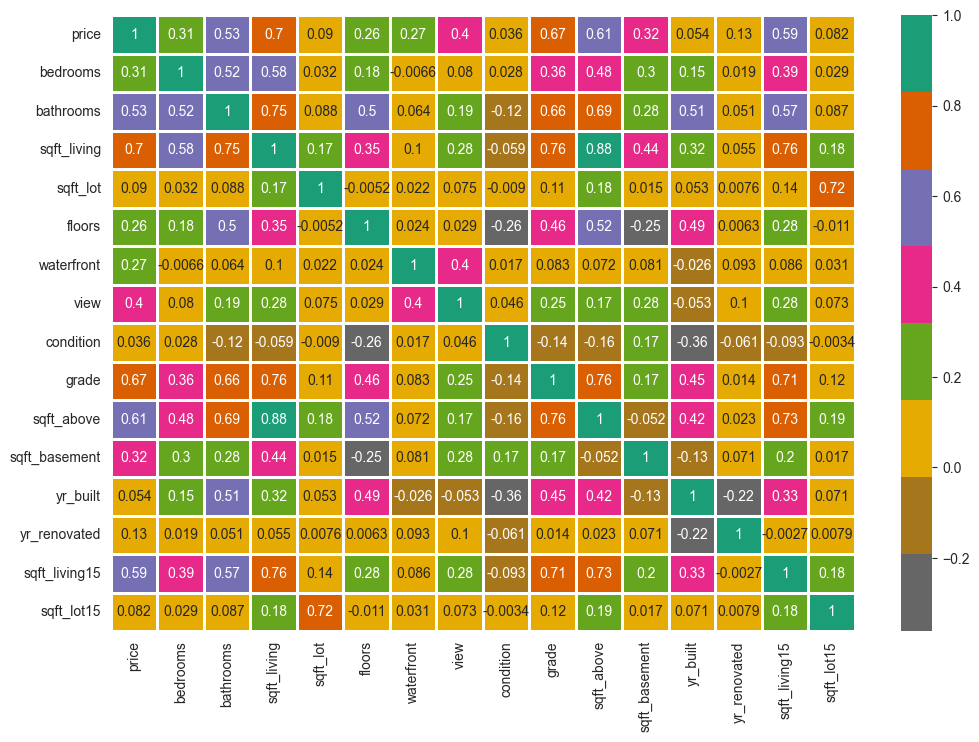

In [100]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [101]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


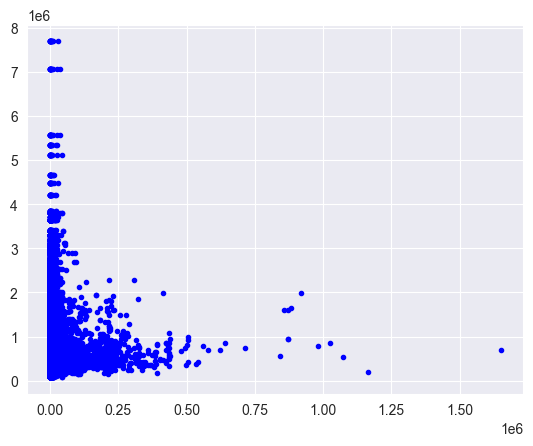

In [103]:
plt.plot(X_train,y_train,'b.')
plt.show()

In [104]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

In [105]:
linear_reg.intercept_

array([6151359.26274133])

In [106]:
y_pred = linear_reg.predict(X_test)
from sklearn import metrics
from sklearn.metrics import r2_score
linear_Mae=metrics.mean_absolute_error(y_test,y_pred)
linear_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score', r2_score(y_test, y_pred))


Error medio Absoluto (MAE): 137480.13882731603
Root Mean Squared Error: 232133.36762408566
r2_score 0.6579723205007496


Polinomial

In [107]:
from sklearn.preprocessing import PolynomialFeatures

poly_transform = PolynomialFeatures(degree=3, include_bias = False)
polyX = poly_transform.fit_transform(X_train)
polyX

array([[5.00000000e+00, 2.75000000e+00, 3.75000000e+03, ...,
        7.06230720e+10, 1.64221278e+11, 3.81867106e+11],
       [4.00000000e+00, 4.50000000e+00, 5.25000000e+03, ...,
        3.02200000e+11, 5.84478976e+12, 1.13042910e+14],
       [3.00000000e+00, 2.50000000e+00, 2.88000000e+03, ...,
        9.21194624e+10, 3.27210820e+11, 1.16226168e+12],
       ...,
       [3.00000000e+00, 2.25000000e+00, 1.78000000e+03, ...,
        1.73857625e+10, 8.77923438e+10, 4.43322266e+11],
       [2.00000000e+00, 1.00000000e+00, 1.15000000e+03, ...,
        9.24639408e+09, 2.73030912e+10, 8.06215680e+10],
       [3.00000000e+00, 1.00000000e+00, 1.45000000e+03, ...,
        8.37158400e+09, 6.23039040e+10, 4.63684824e+11]])

In [108]:
poly_regression = LinearRegression(fit_intercept=True)
poly_regression.fit(polyX, y_train)

LinearRegression()

In [109]:
poly_regression.coef_

array([[-2.61095885e+02,  1.94799681e+01,  7.36856487e+01,
         3.44355280e-03, -5.53722248e+01, -1.19147437e+01,
        -1.33611969e+00,  3.99586651e-01,  9.01854617e-02,
         2.05705202e+00,  9.66689402e-01, -5.41798467e-02,
        -1.44814417e+00, -1.19376403e+00, -1.85682858e+01,
         1.40245749e+00, -1.92334700e-01, -1.15860409e+01,
        -6.07776034e+00,  1.75337027e-01,  4.60366656e-01,
         1.08006405e-01,  1.16516393e+00,  1.13251999e+00,
        -1.46933663e+01,  3.40151878e+00,  3.72667095e+02,
         3.97643611e+00, -1.40007329e+01, -2.50779267e+01,
        -2.71001582e-01, -1.28754891e+02, -5.90497228e+01,
        -4.46752199e-01, -6.42874131e-02, -6.94370006e-02,
        -3.77644274e-02, -3.22683502e-01, -1.03608388e+02,
        -2.51332572e+01, -1.06388577e+02, -2.50039286e+00,
        -1.03861608e+02,  8.64936649e+01, -3.72865019e-01,
         2.88501059e-02, -3.33200797e+02, -2.07333618e+01,
        -5.29072204e+01,  1.32423533e+02,  1.09155914e+0

In [110]:
polyX = poly_transform.fit_transform(X_test)
polyX
y_pred = poly_regression.predict(polyX)

In [111]:
from sklearn import metrics
from sklearn.metrics import r2_score
Poly_Mae=metrics.mean_absolute_error(y_test,y_pred)
Poly_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

Error medio Absoluto (MAE): 149110.84568448795
Root Mean Squared Error: 267502.30518914235
r2_score 0.5458062351742023


### Ridge

In [112]:
X_train2=X_train.to_numpy().reshape(-1,1)

In [113]:
model = Pipeline([("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("linear_reg", LinearRegression())])
model.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('linear_reg', LinearRegression())])

In [114]:
from sklearn.linear_model import Ridge

model_ridge = Pipeline([("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("ridge", Ridge(alpha = 5, solver = 'cholesky', random_state = 42))])
model_ridge.fit(X_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=5, random_state=42, solver='cholesky'))])

In [115]:
y_pred = model.predict(X_test)

In [116]:
from sklearn import metrics
from sklearn.metrics import r2_score
Ridge_Mae=metrics.mean_absolute_error(y_test,y_pred)
Ridge_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

Error medio Absoluto (MAE): 121317.06614912253
Root Mean Squared Error: 186260.82904512723
r2_score 0.7797939871361215


### Lasso

In [118]:
from sklearn.linear_model import Lasso

model_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
                        ("scaler", StandardScaler()),
                        ("lasso", Lasso(alpha = 1, random_state = 42,tol=0.1,max_iter=1000))])


model_lasso.fit(X_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=1, random_state=42, tol=0.1))])

In [119]:
y_pred = model_lasso.predict(X_test)

In [120]:
from sklearn import metrics
from sklearn.metrics import r2_score
Lasso_MAE=metrics.mean_absolute_error(y_test,y_pred)
Lasso_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

Error medio Absoluto (MAE): 127385.8598537924
Root Mean Squared Error: 254950.23977556525
r2_score 0.5874306511507237


In [121]:
def diagramas(metricas):
    sumt=list()
    diagrama=metricas
    sumt.append(diagrama)
    return sumt

In [122]:
Metricas = list()
Metricas.append('Lin')
Metricas.append('Poly')
Metricas.append('Ridge')
Metricas.append('Lasso')

In [123]:
MAE = list()
MAE.append(linear_Mae)
MAE.append(Poly_Mae)
MAE.append(Ridge_Mae)
MAE.append(Lasso_MAE)

MAE
[137480.13882731603, 149110.84568448795, 121317.06614912253, 127385.8598537924]


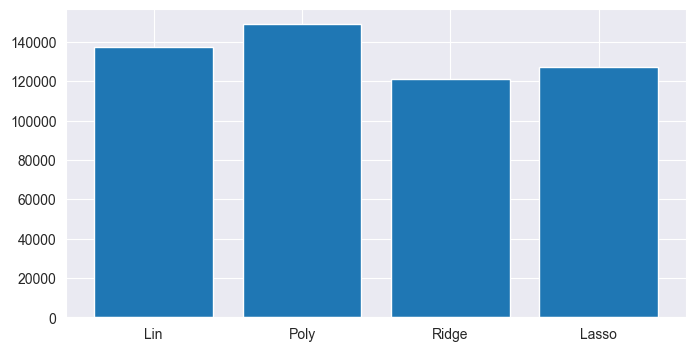

In [124]:
fig, ax = plt.subplots(figsize =(8, 4))
print("MAE")
print(MAE)
Metricas=list(Metricas)
MAE=list(MAE)
plt.bar(Metricas,MAE)


plt.show()

r2
[0.6579723205007496, 0.5458062351742023, 0.7797939871361215, 0.5874306511507237]


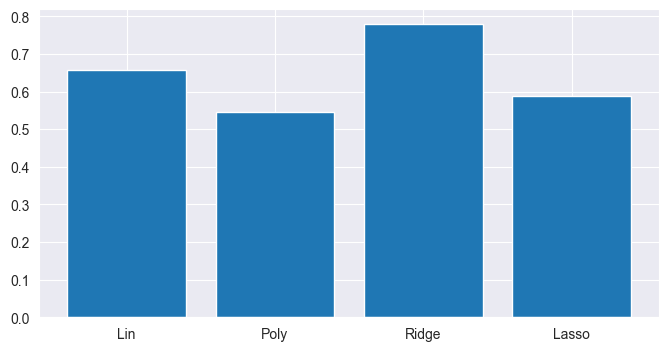

In [125]:
R2 = list()
R2.append(linear_r2)
R2.append(Poly_r2)
R2.append(Ridge_r2)
R2.append(Lasso_r2)
fig, ax = plt.subplots(figsize=(8, 4))
print("r2")
print(R2)
R2 = list(R2)
plt.bar(Metricas, R2)

plt.show()